In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings('ignore')

#for presenting maximum columns
pd.set_option('display.max_columns',None)


In [2]:
df=pd.read_csv('C:\\Users\\Sawardekar\\Desktop\HR.csv')

# EDA:Exploratory Data Analysis Part

In [3]:
df.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,4,Male,79,3,1,Laboratory Technician,4,Single,3068,11864,0,Y,No,13,3,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,3,Female,81,4,1,Laboratory Technician,1,Married,2670,9964,4,Y,Yes,20,4,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,4,Male,67,3,1,Laboratory Technician,3,Divorced,2693,13335,1,Y,No,22,4,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,4,Male,44,2,3,Manufacturing Director,3,Single,9526,8787,0,Y,No,21,4,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,3,Male,94,3,2,Healthcare Representative,3,Married,5237,16577,6,Y,No,13,3,2,80,2,17,3,2,7,7,7,7


In [196]:
#checking shape of the columns
df.shape

(1470, 35)

In [197]:
#checking dtype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

no null values are present but data is in float as well as object so we encode them 

In [ ]:
#checking unique value in the all columns
df.nunique()

# checking value counts and unique value in each columns

In [199]:
#checking value count and unique value in each column
count=1
for x in df:
    print(f'{count}.{x}:{df[x].unique()}')
    print(f'{df[x].value_counts()}',end='\n\n\n')
    count+=1

1.Age:[41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60]
35    78
34    77
36    69
31    69
29    68
32    61
30    60
33    58
38    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
44    33
46    33
43    32
50    30
25    26
24    26
49    24
47    24
55    22
51    19
53    19
48    19
54    18
52    18
22    16
56    14
23    14
58    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: Age, dtype: int64


2.Attrition:['Yes' 'No']
No     1233
Yes     237
Name: Attrition, dtype: int64


3.BusinessTravel:['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64


4.DailyRate:[1102  279 1373 1392  591 1005 1324 1358  216 1299  809  153  670 1346
  103 1389  334 1123 1219  371  673 1218  419  391  699 1282 1125  691
  477  705  924 1459  125  895 

# checking data Discription

In [200]:
##describing the data so that we can make aassumption for skewness and outliers
#If mean value is greater than 50%(median) value then we can say the data skewed data present
#if we have high gap between 75 and max. then we can say the Data is having Outliers
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


documentation:
    
    1)NO missing values are present in dataset.
    
    2)std Dev is too high in almost all the column.
    
    
    3)and min values in all of the columns are zero, so we can replace it by its mean of the column.
    
    4)there is very large difference inmax and 75% in most of the columns so in  some of the columns        outliers is also presnt.

    5)EmployeeNumber:this is a unique column sowe dropped this column.
    
    6)in this dataset StandardHours,EmployeeCount, this is not important columns so we dropped this          columns

# checking null values

In [201]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [202]:
#crosscheking one more time 
df.isnull().sum().sum()

0

<AxesSubplot:>

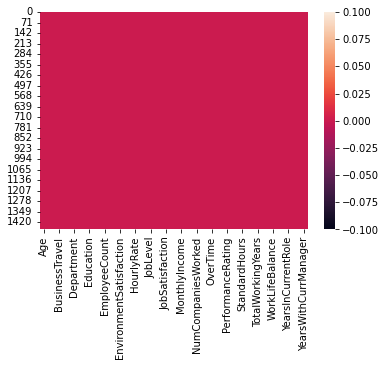

In [203]:
sns.heatmap(df.isnull())

No null values present in the dataset

# checking target variable by plotting countplot

<AxesSubplot:>

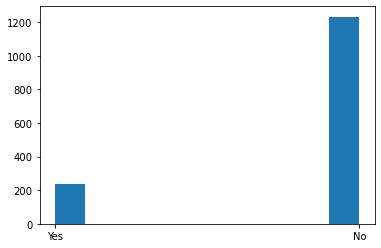

In [204]:
df['Attrition'].hist(grid=False)

here we clearly see yes:237 and NO:1233 so the data is imbalanced so we can balanced the data by SMOTE technique

# transformation techniques

using label Encoder technique to convert the object data into number format.

In [205]:
from sklearn.preprocessing import LabelEncoder

In [206]:
# Encode categorical features by using for loop 
for col in df.columns:
    if df[col].dtype == np.number:
        continue
    df[col] = LabelEncoder().fit_transform(df[col])

In [207]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,23,1,2,624,2,0,1,1,0,0,1,0,64,2,1,7,3,2,809,999,8,0,1,0,0,0,0,0,8,0,0,6,4,0,5
1,31,0,1,113,1,7,0,1,0,1,2,1,31,1,1,6,1,1,682,1328,1,0,0,12,1,3,0,1,10,3,2,10,7,1,7
2,19,1,2,805,1,1,1,4,0,2,3,1,62,1,0,2,2,2,62,18,6,0,1,4,0,1,0,0,7,3,2,0,0,0,0
3,15,0,1,820,1,2,3,1,0,3,3,0,26,2,0,6,2,1,313,1228,1,0,1,0,0,2,0,0,8,3,2,8,7,3,0
4,9,0,2,312,1,1,0,3,0,4,0,1,10,2,0,2,1,1,399,846,9,0,0,1,0,3,0,1,6,3,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,18,0,1,494,1,22,1,3,0,1465,2,1,11,3,1,2,3,1,210,599,4,0,0,6,0,2,0,1,17,3,2,5,2,0,3
1466,21,0,2,327,1,5,0,3,0,1466,3,1,12,1,2,0,0,1,1070,1123,4,0,0,4,0,0,0,1,9,5,2,7,7,1,7
1467,9,0,2,39,1,3,2,1,0,1467,1,1,57,3,1,4,1,1,821,175,1,0,1,9,1,1,0,1,6,0,2,6,2,0,3
1468,31,0,1,579,2,1,2,3,0,1468,3,1,33,1,1,7,1,1,730,641,2,0,0,3,0,3,0,0,17,3,1,9,6,0,8


here we encoded all the columns at a time by for loop by label encoding technique

so all object column are encoded

# checking correlation

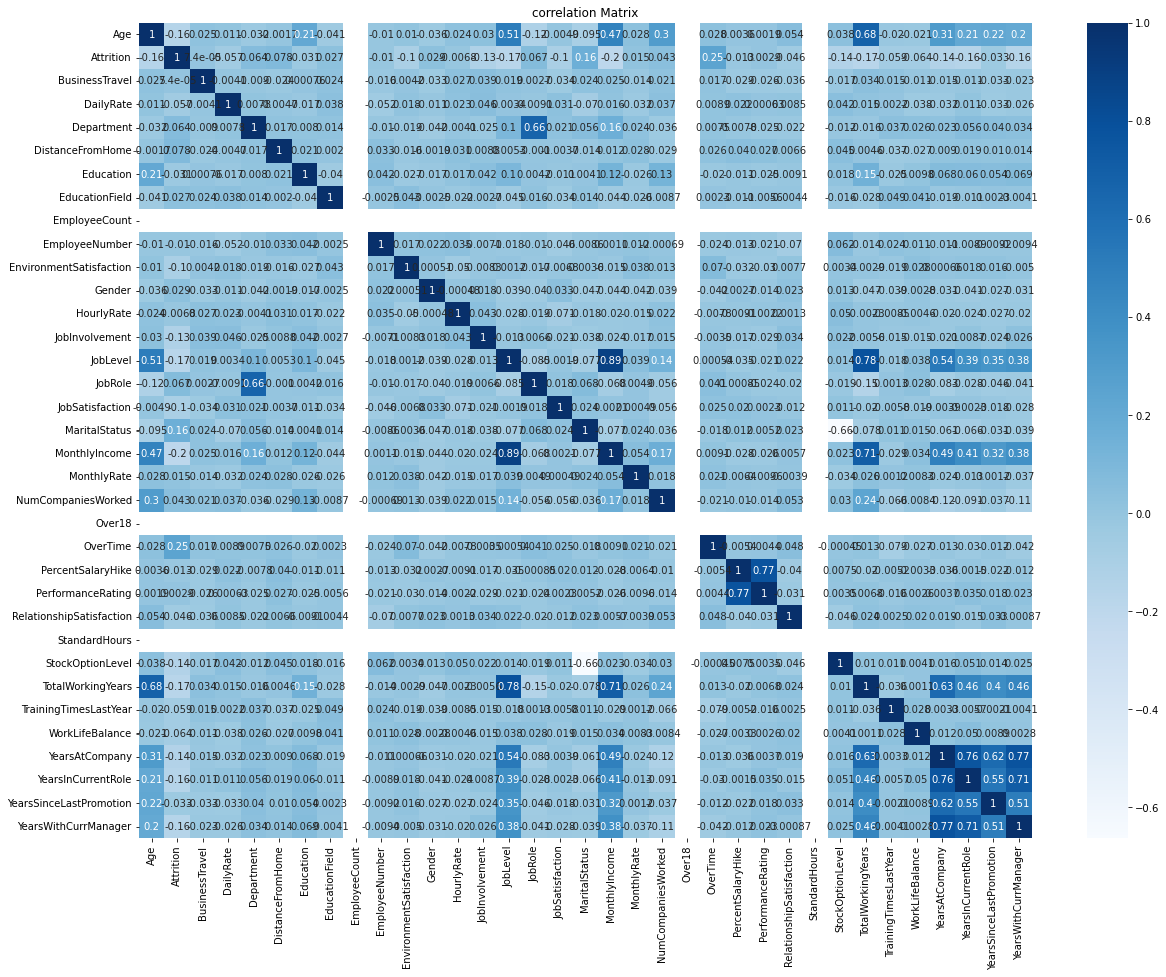

In [208]:
corr_mat=df.corr()#----------------> corelation function

plt.figure(figsize=[20,15])#-------> figure size dimetions
sns.heatmap(corr_mat,annot=True,cmap="Blues")#--> annot = true means will print values
plt.title("correlation Matrix")#---> title
plt.show()

Documentation:    
    
    -EmployeeNumber:this is a unique column so we dropped this column.
    
    -in this dataset StandardHours,EmployeeCount,Over18 this is not important that contains all Nan values  so we dropped this  column
    
    -beacuse of the huge columns we cannot classify the multicollinearity 

# checking correlation with attrition:label

In [209]:
# here we checked the relationship between feature and label
corr_mat['Attrition'].sort_values(ascending=False)

Attrition                   1.000000
OverTime                    0.246118
MaritalStatus               0.162070
DistanceFromHome            0.077924
JobRole                     0.067151
Department                  0.063991
NumCompaniesWorked          0.043494
Gender                      0.029453
EducationField              0.026846
MonthlyRate                 0.015273
PerformanceRating           0.002889
BusinessTravel              0.000074
HourlyRate                 -0.006846
EmployeeNumber             -0.010369
PercentSalaryHike          -0.013478
Education                  -0.031373
YearsSinceLastPromotion    -0.033019
RelationshipSatisfaction   -0.045872
DailyRate                  -0.056605
TrainingTimesLastYear      -0.059478
WorkLifeBalance            -0.063939
EnvironmentSatisfaction    -0.103369
JobSatisfaction            -0.103481
JobInvolvement             -0.130016
YearsAtCompany             -0.136932
StockOptionLevel           -0.137145
YearsWithCurrManager       -0.156199
A

# dropping th unwanted columns in the dataset

In [210]:
#dropping th unwanted columns in the dataset
df.drop(columns=['StandardHours','EmployeeCount','EmployeeNumber','Over18'],axis=1,inplace=True)


In [211]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,23,1,2,624,2,0,1,1,1,0,64,2,1,7,3,2,809,999,8,1,0,0,0,0,8,0,0,6,4,0,5
1,31,0,1,113,1,7,0,1,2,1,31,1,1,6,1,1,682,1328,1,0,12,1,3,1,10,3,2,10,7,1,7
2,19,1,2,805,1,1,1,4,3,1,62,1,0,2,2,2,62,18,6,1,4,0,1,0,7,3,2,0,0,0,0
3,15,0,1,820,1,2,3,1,3,0,26,2,0,6,2,1,313,1228,1,1,0,0,2,0,8,3,2,8,7,3,0
4,9,0,2,312,1,1,0,3,0,1,10,2,0,2,1,1,399,846,9,0,1,0,3,1,6,3,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,18,0,1,494,1,22,1,3,2,1,11,3,1,2,3,1,210,599,4,0,6,0,2,1,17,3,2,5,2,0,3
1466,21,0,2,327,1,5,0,3,3,1,12,1,2,0,0,1,1070,1123,4,0,4,0,0,1,9,5,2,7,7,1,7
1467,9,0,2,39,1,3,2,1,1,1,57,3,1,4,1,1,821,175,1,1,9,1,1,1,6,0,2,6,2,0,3
1468,31,0,1,579,2,1,2,3,3,1,33,1,1,7,1,1,730,641,2,0,3,0,3,0,17,3,1,9,6,0,8


# Data Preprocessing:-

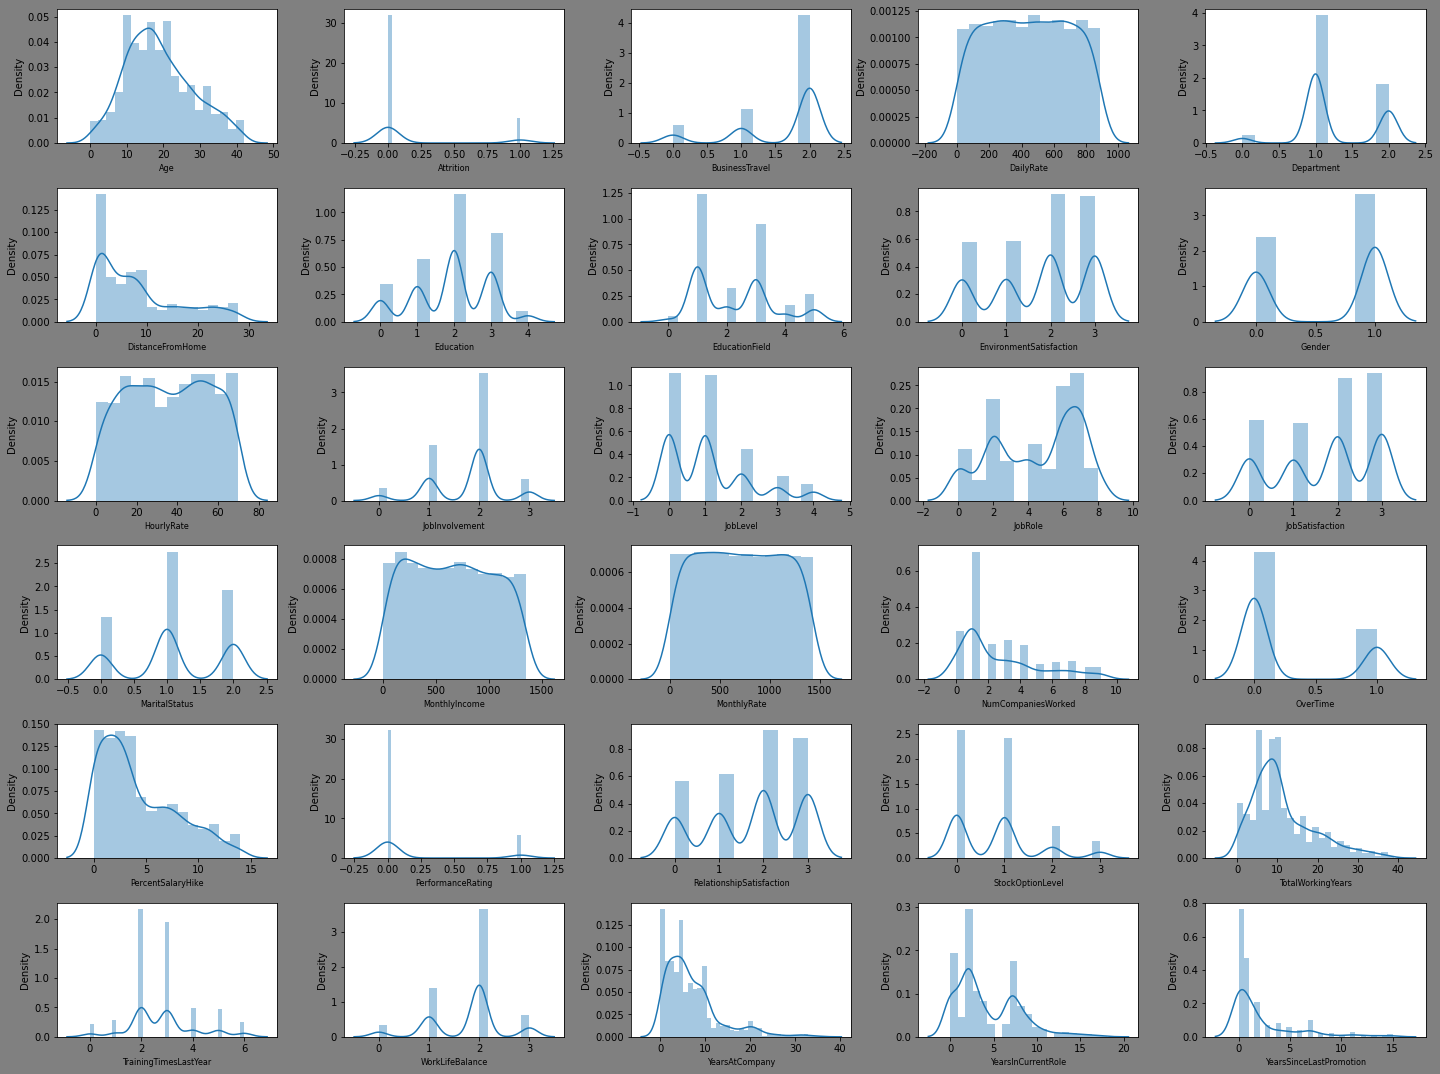

In [212]:
# checking wether te data is normally distributed or not!!!!!!!!!!!!
plt.figure(figsize=(20,15),facecolor='gray')
plotnumber=1

for column in df:
    if plotnumber<=30:
        ax = plt.subplot(6,5,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=8)
    
    
    plotnumber+=1
plt.tight_layout()

data is not normally distributed .skewness and ouliers is present in the columns so that we can remove next .

# Creating Feature and label

In [213]:
X=df.drop('Attrition',axis=1) # all features
y=df.Attrition                 # label

# now checking outliers By boxplot 

we have lots of columns in our dataset and plotting all the columns in one graph this is impossible to find  the outlies so first we plot the first 16 columns and then onther .

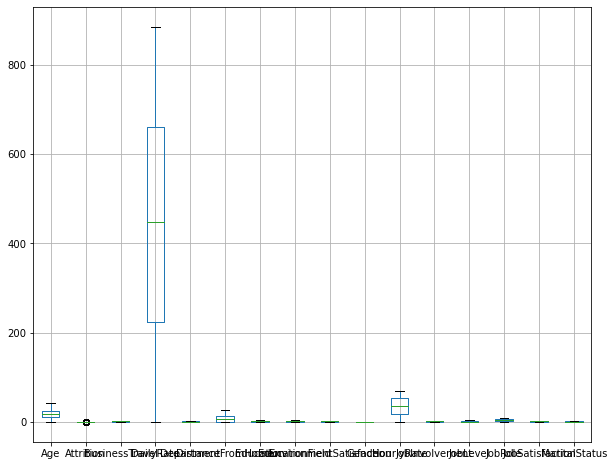

In [220]:
#plotting the boxplot 
df.iloc[:,0:16].boxplot(figsize=(10,8))
plt.subplots_adjust()
plt.show()

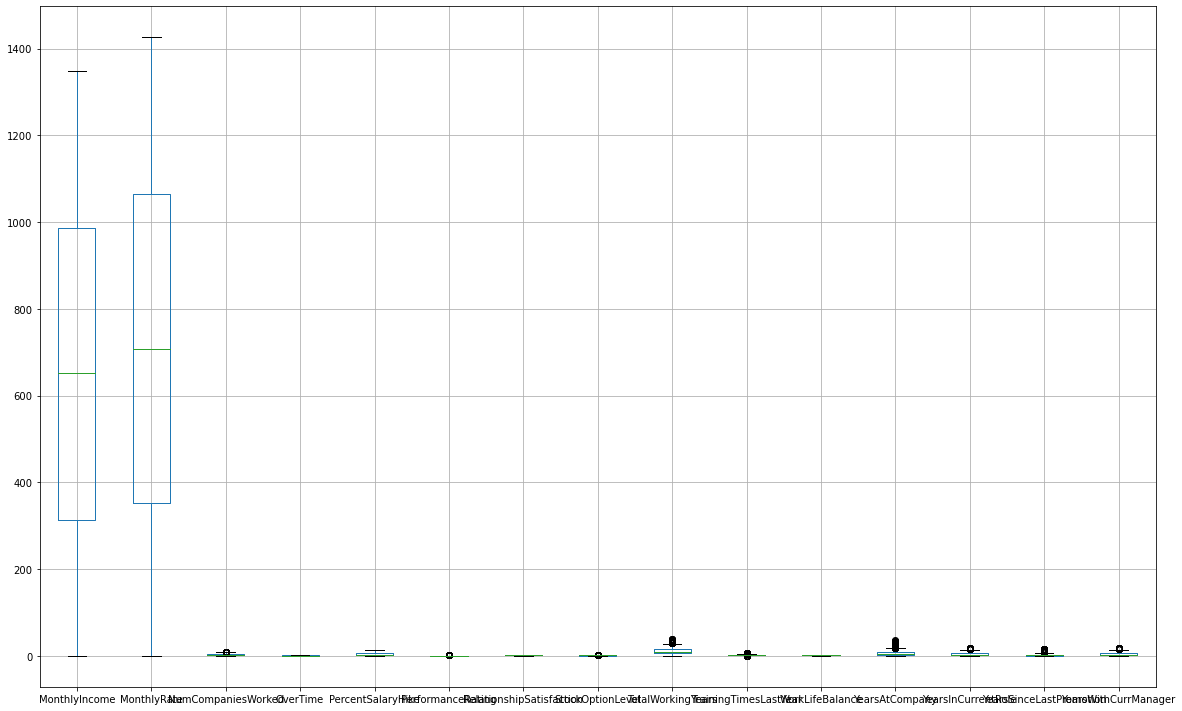

In [226]:
df.iloc[:,16:].boxplot(figsize=(20,15))
plt.subplots_adjust(bottom=0.25)
plt.show()

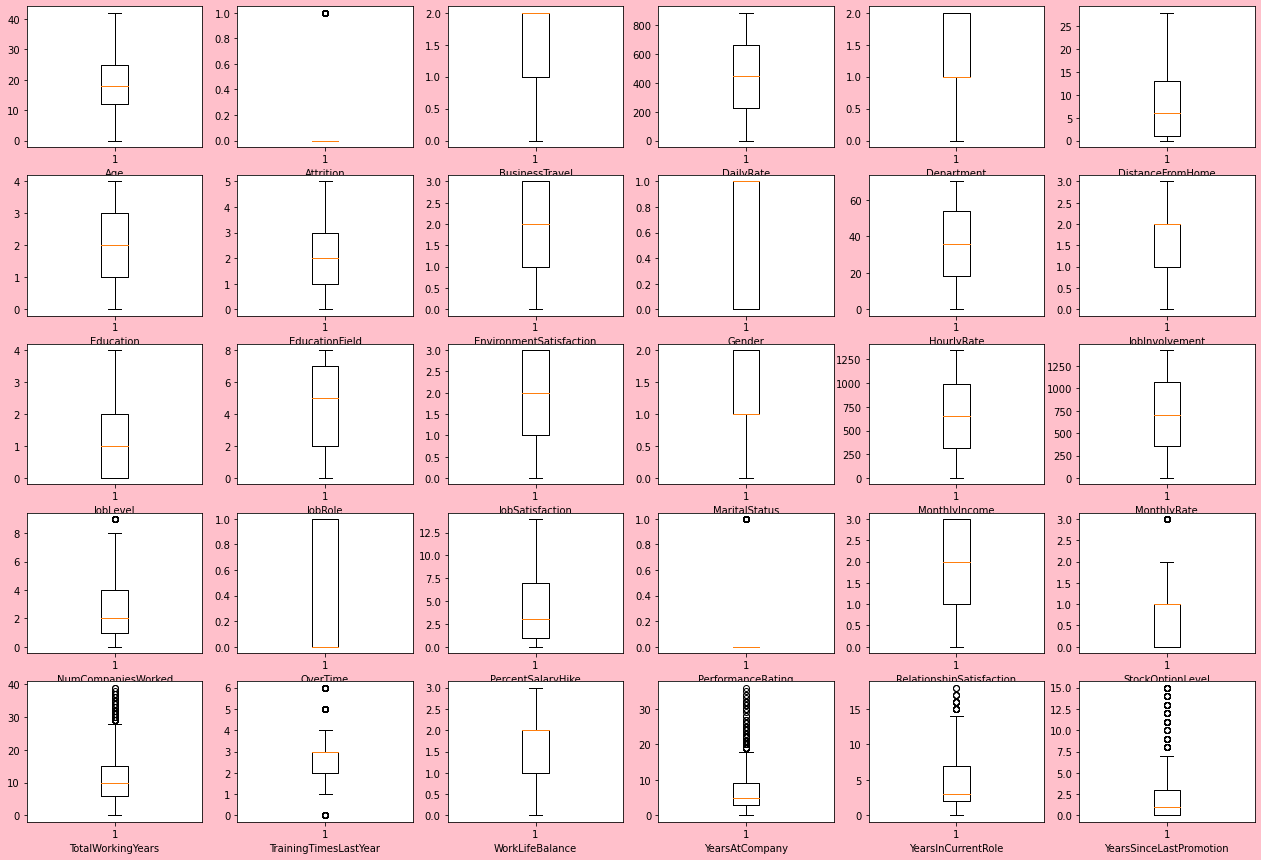

In [227]:
#checking one more time
plt.figure(figsize=(22,15),facecolor='pink')
plotnumber=1

for column in df:
    if plotnumber<=30:
        ax=plt.subplot(5,6,plotnumber)
        plt.boxplot(df[column])
        plt.xlabel(column)
        
    plotnumber+=1
plt.show()

so here we can see in NumCompaniesWorked,performance rating ,StockOptionLevel,total working years,training times last year,years at company,years in current role,yearssince last promotion columns having the outliers

# removing the outliers by zscore method

In [228]:
from scipy.stats import zscore

In [229]:
z=np.abs(zscore(df))
z

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.446350,2.280906,0.590048,0.713914,1.401512,1.010909,0.891688,0.937414,0.660531,1.224745,1.383138,0.379672,0.057788,1.032716,1.153254,1.236820,0.396200,0.703814,2.125136,1.591746,1.150554,0.426230,1.584178,0.932014,0.421735,2.171982,2.493820,0.163801,0.063296,0.679146,0.245834
1,1.322365,0.438422,0.913194,1.302446,0.493817,0.147150,1.868426,0.937414,0.254625,0.816497,0.240677,1.026167,0.057788,0.626374,0.660853,0.133282,0.069401,1.502965,0.678049,0.628241,2.129306,2.346151,1.191438,0.241988,0.164441,0.155707,0.338096,0.497250,0.764998,0.368715,0.806541
2,0.008343,2.280906,0.590048,1.428124,0.493817,0.887515,0.891688,1.316673,1.169781,0.816497,1.284725,1.026167,0.961486,0.998992,0.246200,1.236820,1.525991,1.679064,1.324226,1.591746,0.057267,0.426230,0.658973,0.932014,0.550382,0.155707,0.338096,1.155378,1.167687,0.679146,1.155935
3,0.429664,0.438422,0.913194,1.487313,0.493817,0.764121,1.061787,0.937414,1.169781,1.224745,0.486709,0.379672,0.961486,0.626374,0.246200,0.133282,0.880114,1.260062,0.678049,1.591746,1.150554,0.426230,0.266233,0.932014,0.421735,0.155707,0.338096,0.166724,0.764998,0.252146,1.155935
4,1.086676,0.438422,0.590048,0.517210,0.493817,0.887515,1.868426,0.565311,1.575686,0.816497,1.274014,0.379672,0.961486,0.998992,0.660853,0.133282,0.658818,0.332172,2.525591,0.628241,0.877232,0.426230,1.191438,0.241988,0.679030,0.155707,0.338096,0.824853,0.615492,0.058285,0.595227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.101159,0.438422,0.913194,0.200946,0.493817,1.703764,0.891688,0.565311,0.254625,0.816497,1.224807,1.785511,0.057788,0.998992,1.153254,0.133282,1.145155,0.267798,0.523316,0.628241,0.489376,0.426230,0.266233,0.241988,0.736090,0.155707,0.338096,0.329064,0.615492,0.679146,0.314873
1466,0.227347,0.438422,0.590048,0.458021,0.493817,0.393938,1.868426,0.565311,1.169781,0.816497,1.175601,1.026167,0.845911,1.811675,1.567907,0.133282,1.067808,1.005013,0.523316,0.628241,0.057267,0.426230,1.584178,0.241988,0.293088,1.707500,0.338096,0.001462,0.764998,0.368715,0.806541
1467,1.086676,0.438422,0.590048,1.594443,0.493817,0.640727,0.085049,0.937414,0.660531,0.816497,1.038693,1.785511,0.057788,0.186309,0.660853,0.133282,0.427078,1.297707,0.678049,1.591746,1.309341,2.346151,0.658973,0.241988,0.679030,2.171982,0.338096,0.163801,0.615492,0.679146,0.314873
1468,1.322365,0.438422,0.913194,0.536349,1.401512,0.887515,0.085049,0.565311,1.169781,0.816497,0.142264,1.026167,0.057788,1.032716,0.660853,0.133282,0.192916,0.165779,0.277594,0.628241,0.330589,0.426230,1.191438,0.932014,0.736090,0.155707,1.077862,0.331987,0.488900,0.679146,1.086895


In [230]:
threshold=3
print(np.where(z>3))


(array([  28,   45,   62,   62,   63,   64,   85,   98,   98,  110,  123,
        123,  123,  126,  126,  126,  153,  178,  187,  187,  190,  190,
        218,  231,  231,  237,  237,  270,  270,  281,  326,  386,  386,
        401,  411,  425,  425,  427,  445,  466,  473,  477,  535,  561,
        561,  584,  592,  595,  595,  595,  616,  624,  635,  653,  653,
        677,  686,  701,  716,  746,  749,  752,  799,  838,  861,  861,
        875,  875,  894,  914,  914,  918,  922,  926,  926,  937,  956,
        962,  976,  976, 1008, 1024, 1043, 1078, 1078, 1086, 1086, 1093,
       1111, 1116, 1116, 1135, 1138, 1138, 1156, 1184, 1221, 1223, 1242,
       1295, 1301, 1301, 1303, 1327, 1331, 1348, 1351, 1401, 1414, 1430],
      dtype=int64), array([30, 29, 27, 29, 28, 29, 24, 24, 27, 29, 28, 29, 30, 24, 27, 29, 30,
       29, 24, 30, 27, 28, 29, 28, 30, 27, 29, 24, 27, 28, 29, 29, 30, 24,
       27, 27, 29, 29, 24, 28, 27, 27, 29, 27, 30, 29, 27, 24, 27, 29, 30,
       24, 30, 27, 29, 

In [231]:
df_new=df[(z<3).all(axis=1)]
df_new

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,23,1,2,624,2,0,1,1,1,0,64,2,1,7,3,2,809,999,8,1,0,0,0,0,8,0,0,6,4,0,5
1,31,0,1,113,1,7,0,1,2,1,31,1,1,6,1,1,682,1328,1,0,12,1,3,1,10,3,2,10,7,1,7
2,19,1,2,805,1,1,1,4,3,1,62,1,0,2,2,2,62,18,6,1,4,0,1,0,7,3,2,0,0,0,0
3,15,0,1,820,1,2,3,1,3,0,26,2,0,6,2,1,313,1228,1,1,0,0,2,0,8,3,2,8,7,3,0
4,9,0,2,312,1,1,0,3,0,1,10,2,0,2,1,1,399,846,9,0,1,0,3,1,6,3,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,18,0,1,494,1,22,1,3,2,1,11,3,1,2,3,1,210,599,4,0,6,0,2,1,17,3,2,5,2,0,3
1466,21,0,2,327,1,5,0,3,3,1,12,1,2,0,0,1,1070,1123,4,0,4,0,0,1,9,5,2,7,7,1,7
1467,9,0,2,39,1,3,2,1,1,1,57,3,1,4,1,1,821,175,1,1,9,1,1,1,6,0,2,6,2,0,3
1468,31,0,1,579,2,1,2,3,3,1,33,1,1,7,1,1,730,641,2,0,3,0,3,0,17,3,1,9,6,0,8


# Checking skewness 

In [232]:
X.skew().sort_values(ascending=False)

YearsSinceLastPromotion     1.984290
PerformanceRating           1.921883
YearsAtCompany              1.676650
TotalWorkingYears           1.112899
NumCompaniesWorked          1.026471
JobLevel                    1.025401
StockOptionLevel            0.968980
OverTime                    0.964489
DistanceFromHome            0.958118
YearsInCurrentRole          0.917363
YearsWithCurrManager        0.833451
PercentSalaryHike           0.821128
TrainingTimesLastYear       0.553124
EducationField              0.550371
Age                         0.413286
Department                  0.172231
MonthlyIncome               0.060816
MonthlyRate                 0.012315
DailyRate                   0.000930
HourlyRate                 -0.032311
MaritalStatus              -0.152175
Education                  -0.289681
RelationshipSatisfaction   -0.302828
EnvironmentSatisfaction    -0.321654
JobSatisfaction            -0.329672
JobRole                    -0.357270
Gender                     -0.408665
J

here we can see skewness is present in the columns so we can remove it by power transform method

# Using Power_transform method to remove the skewness

In [1]:
from sklearn.preprocessing import power_transform

In [ ]:
x_new=power_transform(X)

In [235]:
pd.DataFrame(x_new).skew().sort_values(ascending=False)

20    1.921883
18    0.964489
28    0.212129
22    0.087019
24    0.058058
11    0.057017
17    0.014814
3     0.013801
6    -0.008386
26   -0.009847
23   -0.010839
0    -0.031035
25   -0.038587
10   -0.046711
19   -0.050437
4    -0.060046
27   -0.060849
29   -0.067565
5    -0.146061
14   -0.156911
21   -0.250323
7    -0.263120
9    -0.264831
15   -0.268411
13   -0.270850
2    -0.279407
16   -0.285494
12   -0.319659
8    -0.408665
1    -0.970506
dtype: float64

In [236]:
pd.DataFrame(x_new,columns=X.columns).skew().sort_values(ascending=False)

PerformanceRating           1.921883
OverTime                    0.964489
YearsSinceLastPromotion     0.212129
StockOptionLevel            0.087019
TrainingTimesLastYear       0.058058
JobLevel                    0.057017
NumCompaniesWorked          0.014814
Department                  0.013801
EducationField             -0.008386
YearsAtCompany             -0.009847
TotalWorkingYears          -0.010839
Age                        -0.031035
WorkLifeBalance            -0.038587
JobInvolvement             -0.046711
PercentSalaryHike          -0.050437
DistanceFromHome           -0.060046
YearsInCurrentRole         -0.060849
YearsWithCurrManager       -0.067565
Education                  -0.146061
MaritalStatus              -0.156911
RelationshipSatisfaction   -0.250323
EnvironmentSatisfaction    -0.263120
HourlyRate                 -0.264831
MonthlyIncome              -0.268411
JobSatisfaction            -0.270850
DailyRate                  -0.279407
MonthlyRate                -0.285494
J

In [237]:
pd.DataFrame(x_new,columns=X.columns).skew().sort_values(ascending=False)

PerformanceRating           1.921883
OverTime                    0.964489
YearsSinceLastPromotion     0.212129
StockOptionLevel            0.087019
TrainingTimesLastYear       0.058058
JobLevel                    0.057017
NumCompaniesWorked          0.014814
Department                  0.013801
EducationField             -0.008386
YearsAtCompany             -0.009847
TotalWorkingYears          -0.010839
Age                        -0.031035
WorkLifeBalance            -0.038587
JobInvolvement             -0.046711
PercentSalaryHike          -0.050437
DistanceFromHome           -0.060046
YearsInCurrentRole         -0.060849
YearsWithCurrManager       -0.067565
Education                  -0.146061
MaritalStatus              -0.156911
RelationshipSatisfaction   -0.250323
EnvironmentSatisfaction    -0.263120
HourlyRate                 -0.264831
MonthlyIncome              -0.268411
JobSatisfaction            -0.270850
DailyRate                  -0.279407
MonthlyRate                -0.285494
J

In [238]:
x1=pd.DataFrame(x_new,columns=X.columns)

In [239]:
x1.skew().sort_values(ascending=False)

PerformanceRating           1.921883
OverTime                    0.964489
YearsSinceLastPromotion     0.212129
StockOptionLevel            0.087019
TrainingTimesLastYear       0.058058
JobLevel                    0.057017
NumCompaniesWorked          0.014814
Department                  0.013801
EducationField             -0.008386
YearsAtCompany             -0.009847
TotalWorkingYears          -0.010839
Age                        -0.031035
WorkLifeBalance            -0.038587
JobInvolvement             -0.046711
PercentSalaryHike          -0.050437
DistanceFromHome           -0.060046
YearsInCurrentRole         -0.060849
YearsWithCurrManager       -0.067565
Education                  -0.146061
MaritalStatus              -0.156911
RelationshipSatisfaction   -0.250323
EnvironmentSatisfaction    -0.263120
HourlyRate                 -0.264831
MonthlyIncome              -0.268411
JobSatisfaction            -0.270850
DailyRate                  -0.279407
MonthlyRate                -0.285494
J

In [240]:
sk=x1.skew().sort_values(ascending=False)

In [241]:
sk[np.abs(sk)>0.5]


PerformanceRating    1.921883
OverTime             0.964489
BusinessTravel      -0.970506
dtype: float64

In [242]:
x1.skew()[np.abs(x1.skew())<0.5].all()

True

In [244]:
x1.skew().sort_values(ascending=False)

PerformanceRating           1.921883
OverTime                    0.964489
YearsSinceLastPromotion     0.212129
StockOptionLevel            0.087019
TrainingTimesLastYear       0.058058
JobLevel                    0.057017
NumCompaniesWorked          0.014814
Department                  0.013801
EducationField             -0.008386
YearsAtCompany             -0.009847
TotalWorkingYears          -0.010839
Age                        -0.031035
WorkLifeBalance            -0.038587
JobInvolvement             -0.046711
PercentSalaryHike          -0.050437
DistanceFromHome           -0.060046
YearsInCurrentRole         -0.060849
YearsWithCurrManager       -0.067565
Education                  -0.146061
MaritalStatus              -0.156911
RelationshipSatisfaction   -0.250323
EnvironmentSatisfaction    -0.263120
HourlyRate                 -0.264831
MonthlyIncome              -0.268411
JobSatisfaction            -0.270850
DailyRate                  -0.279407
MonthlyRate                -0.285494
J

now skewness has been removed now we can proceed

the skewness  range is under 0.5

# Using SMOTE:synthetic minority over sampling technique method: to Balance the data


here we are balancing technique because our dataset is imbalanced

In [114]:
dfy=df_new.iloc[:,1]
dfy

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1387, dtype: int32

In [115]:
dfy.value_counts()

0    1158
1     229
Name: Attrition, dtype: int64

In [116]:
dfx=df_new.iloc[:,[0,2,3,4,5,6,7,8,9,10,11,12,13,14,15,6,17,18,19,20,21,22,23,24,25,26,27,28,29,30]]
dfx

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,Education,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,23,2,624,2,0,1,1,1,0,64,2,1,7,3,2,1,999,8,1,0,0,0,0,8,0,0,6,4,0,5
1,31,1,113,1,7,0,1,2,1,31,1,1,6,1,1,0,1328,1,0,12,1,3,1,10,3,2,10,7,1,7
2,19,2,805,1,1,1,4,3,1,62,1,0,2,2,2,1,18,6,1,4,0,1,0,7,3,2,0,0,0,0
3,15,1,820,1,2,3,1,3,0,26,2,0,6,2,1,3,1228,1,1,0,0,2,0,8,3,2,8,7,3,0
4,9,2,312,1,1,0,3,0,1,10,2,0,2,1,1,0,846,9,0,1,0,3,1,6,3,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,18,1,494,1,22,1,3,2,1,11,3,1,2,3,1,1,599,4,0,6,0,2,1,17,3,2,5,2,0,3
1466,21,2,327,1,5,0,3,3,1,12,1,2,0,0,1,0,1123,4,0,4,0,0,1,9,5,2,7,7,1,7
1467,9,2,39,1,3,2,1,1,1,57,3,1,4,1,1,2,175,1,1,9,1,1,1,6,0,2,6,2,0,3
1468,31,1,579,2,1,2,3,3,1,33,1,1,7,1,1,2,641,2,0,3,0,3,0,17,3,1,9,6,0,8


# applying Smote

In [117]:
import sklearn

In [118]:
sklearn.__version__

'1.1.1'

pip install scikit-learn

In [119]:
import numpy

In [120]:
numpy.__version__

'1.20.3'

In [121]:
!pip install -U imbalanced-learn
!pip install --user imblearn

In [122]:
from imblearn.over_sampling import SMOTE

In [123]:
smt=SMOTE()


In [124]:
trainx,trainy=smt.fit_resample(x1,y)

In [125]:
trainx.value_counts()

Age        BusinessTravel  DailyRate  Department  DistanceFromHome  Education  EducationField  EnvironmentSatisfaction  Gender     HourlyRate  JobInvolvement  JobLevel   JobRole    JobSatisfaction  MaritalStatus  MonthlyIncome  MonthlyRate  NumCompaniesWorked  OverTime   PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager
-2.764919  -1.846466       -1.444544  -0.472127    0.252181         -1.792814   0.697390        0.232590                 0.816497   0.714424    0.331363       -1.181109  -1.008957   0.223051         1.235505      -1.923245       0.007657    -0.571302           -0.628241  -0.889429          -0.426230           1.209422                 -1.087933         -2.565013          -2.579073               0.282156        -2.224163       -1.596434           -1.094862                -1.550156               1
 0.20

In [126]:
trainy.value_counts()

1    1233
0    1233
Name: Attrition, dtype: int64

In [127]:
X=trainx
y=trainy

In [128]:
X.shape

(2466, 30)

In [129]:
y.shape

(2466,)

now our data is balanced

so wecan proceed ahead

# Using PCA technique for selecting  the best features

In [130]:
from sklearn.decomposition import PCA

In [131]:
X=df_new.iloc[:,[0,2,3,4,5,6,7,8,9,10,11,12,13,14,15,6,17,18,19,20,21,22,23,24,25,26,27,28,29,30]] # here we are selecting features excluding label

In [132]:
pca=PCA(n_components=7)

In [133]:
y=df_new.iloc[:,1]

In [134]:
xpca=pca.fit_transform(X)

In [135]:
X=xpca

In [136]:
pd.DataFrame(data=X)

,0,1,2,3,4,5,6
0,284.612716,187.446436,-28.080712,2.313633,-8.914505,-2.059135,-2.426480
1,629.006521,-313.349643,4.090044,11.145062,-1.345867,-0.895952,-9.212896
2,-701.428971,338.561724,-25.411861,-3.362418,-7.372610,-8.252782,1.557948
3,507.571827,390.261190,10.131209,-4.242803,-6.361742,2.688759,-1.312778
4,141.184972,-129.127249,25.743238,-10.085509,-7.286954,-1.441173,4.226850
...,...,...,...,...,...,...,...
1382,-111.207563,45.305643,24.753698,2.960605,14.268607,-1.431353,6.487102
1383,417.607291,-105.705190,23.514663,2.594807,-3.139876,1.177638,-3.103272
1384,-521.241985,-422.330756,-21.157876,-9.392977,-5.083127,1.877381,1.027037
1385,-71.832321,131.576992,3.023856,14.724810,-6.870914,0.150045,-2.444364


This technique mainly used when we have higher numbers of dataset to select the best features

here we can select the best 7 features 

# finding best test size value for trained the model¶

In [137]:
#To get best Test size number from 1 to 40%
#from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
#dt=DecisionTreeClassifier()
#lr=LogisticRegression()
rf=RandomForestClassifier()
#from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split


maxAcc = 0
maxRs=0

for i in range(10,41):
    i1=i*0.010
    x_train, x_test, y_train, y_test= train_test_split(X,y,test_size=i1)
    rf=RandomForestClassifier()
    rf.fit(x_train,y_train)
    pred=rf.predict(x_test)
    acc=rf.score(x_test,y_test)
    #print('accuracy',acc,'Random state',i)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i1
        print('accuracy',maxAcc,'Random state',i1)
print("Best accuracy is",maxAcc*100,"on Random state",maxRs)

accuracy 0.8057553956834532 Random state 0.1
accuracy 0.8104575163398693 Random state 0.11
accuracy 0.8323353293413174 Random state 0.12
accuracy 0.8784530386740331 Random state 0.13
accuracy 0.9067796610169492 Random state 0.17
Best accuracy is 90.67796610169492 on Random state 0.17


# finding the best random state value for trained the model

In [139]:
#To get best Test size number from 1 to 40%
#from sklearn.linear_model import LogisticRegression
#from sklearn.tree import DecisionTreeClassifier
#dt=DecisionTreeClassifier()
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
#from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split


maxAcc = 0
maxRs=0

for i in range(1,500):
    x_train, x_test, y_train, y_test= train_test_split(X,y,test_size=0.17,random_state=i)
    rf=RandomForestClassifier()
    rf.fit(x_train,y_train)
    pred=rf.predict(x_test)
    acc=rf.score(x_test,y_test)
    #print('accuracy',acc,'Random state',i)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i
        print('accuracy',maxAcc,'Random state',i)
print("Best accuracy is",maxAcc*100,"on Random state",maxRs)

accuracy 0.8177966101694916 Random state 1
accuracy 0.864406779661017 Random state 3
accuracy 0.8813559322033898 Random state 48
accuracy 0.885593220338983 Random state 76
accuracy 0.9067796610169492 Random state 81
Best accuracy is 90.67796610169492 on Random state 81


In [143]:
print("Best accuracy is",maxAcc*100,"on Random state",maxRs)

Best accuracy is 90.67796610169492 on Random state 81


# train test split 

In [144]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.17,random_state=81)

In [145]:
x_train.shape          #checking the shape 

(1151, 7)

In [146]:
y_train.shape

(1151,)

In [147]:
x_test.shape

(236, 7)

In [148]:
y_test.shape

(236,)

# Using various models and trained the model

In [151]:
#Using LOgistic regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.8940677966101694
[[211   0]
 [ 25   0]]
              precision    recall  f1-score   support

           0       0.89      1.00      0.94       211
           1       0.00      0.00      0.00        25

    accuracy                           0.89       236
   macro avg       0.45      0.50      0.47       236
weighted avg       0.80      0.89      0.84       236



In [152]:
#using DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.7627118644067796
[[173  38]
 [ 18   7]]
              precision    recall  f1-score   support

           0       0.91      0.82      0.86       211
           1       0.16      0.28      0.20        25

    accuracy                           0.76       236
   macro avg       0.53      0.55      0.53       236
weighted avg       0.83      0.76      0.79       236



In [153]:
#using  RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier 
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.902542372881356
[[210   1]
 [ 22   3]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       211
           1       0.75      0.12      0.21        25

    accuracy                           0.90       236
   macro avg       0.83      0.56      0.58       236
weighted avg       0.89      0.90      0.87       236



In [154]:
#using svc
from sklearn.svm import SVC
sv=SVC()
sv.fit(x_train,y_train)
y_pred=sv.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.8940677966101694
[[211   0]
 [ 25   0]]
              precision    recall  f1-score   support

           0       0.89      1.00      0.94       211
           1       0.00      0.00      0.00        25

    accuracy                           0.89       236
   macro avg       0.45      0.50      0.47       236
weighted avg       0.80      0.89      0.84       236



In [156]:
#using KNN
from sklearn.neighbors import KNeighborsClassifier
knc=KNeighborsClassifier()
knc.fit(x_train,y_train)
y_pred=knc.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.8728813559322034
[[204   7]
 [ 23   2]]
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       211
           1       0.22      0.08      0.12        25

    accuracy                           0.87       236
   macro avg       0.56      0.52      0.52       236
weighted avg       0.83      0.87      0.85       236



# Logistic Regression DecisionTreeClassifier,Rf,SVC,KNN giving  best accuracy now will check the cross validaion score

In [157]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(lr,X,y,cv=5)
print('cross vaidation score',scr.mean())

cross vaidation score 0.8348933849310445


In [158]:
#checking for desicionTereeClassifier
from sklearn.model_selection import cross_val_score
scr=cross_val_score(dt,X,y,cv=5)
print('cross vaidation score',scr.mean())

cross vaidation score 0.7440640989013844


In [159]:
#checking for randomforest
from sklearn.model_selection import cross_val_score
scr=cross_val_score(rf,X,y,cv=5)
print('cross vaidation score',scr.mean())

cross vaidation score 0.8377840687738617


In [160]:
#checking for svc
from sklearn.model_selection import cross_val_score
scr=cross_val_score(sv,X,y,cv=5)
print('cross vaidation score',scr.mean())

cross vaidation score 0.8348959821312626


In [161]:
#checking for knc
from sklearn.model_selection import cross_val_score
scr=cross_val_score(knc,X,y,cv=5)
print('cross vaidation score',scr.mean())

cross vaidation score 0.8168921902189441


so random Forest Classifier is performing better among all so we will continue with random forest classifier

# Using Hyperparameter tunning

In [171]:
from sklearn.model_selection import GridSearchCV
clf = RandomForestClassifier()

params={'max_features':['auto','sqrt','log2'],
       'max_depth':[10,15],
       'criterion':['gini','entropy']
       }

grd=GridSearchCV(clf,param_grid=params,cv=5,scoring='accuracy')

grd.fit(x_train,y_train)

print('best_params:',grd.best_params_)

clf=grd.best_estimator_

clf.fit(x_train,y_train)

y_pred=clf.predict(x_test)

rf_conf_mat=confusion_matrix(y_test,y_pred)

print(rf_conf_mat)

print(accuracy_score(y_test,y_pred))


best_params: {'criterion': 'entropy', 'max_depth': 15, 'max_features': 'auto'}
[[210   1]
 [ 22   3]]
0.902542372881356


by using hyper parameter tunning accurac is  90.2

# plot the ROC corve

In [184]:
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
tpr,fpr,thresholds=roc_curve(y_test,y_pred)


In [185]:
fpr,tpr,thresholds

(array([0.  , 0.12, 1.  ]),
 array([0.        , 0.00473934, 1.        ]),
 array([2, 1, 0]))

In [186]:
print("threshold",thresholds)
print("False positive rate",fpr)
print('True positive rate',tpr)

threshold [2 1 0]
False positive rate [0.   0.12 1.  ]
True positive rate [0.         0.00473934 1.        ]


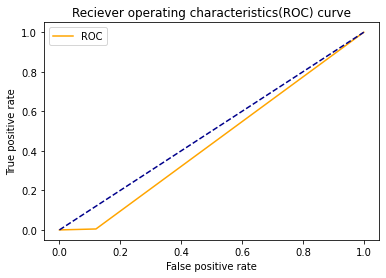

In [187]:
plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Reciever operating characteristics(ROC) curve')
plt.legend()
plt.show()
    
        

# Auc score

In [188]:
auc_score=roc_auc_score(y_test,y_pred)
print(auc_score)

0.5576303317535545


# Classification Report

In [189]:
from sklearn.metrics import classification_report


In [190]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95       211
           1       0.75      0.12      0.21        25

    accuracy                           0.90       236
   macro avg       0.83      0.56      0.58       236
weighted avg       0.89      0.90      0.87       236



# saving the model in pickel format

In [192]:
import joblib
joblib.dump(accuracy_score(y_test, pred)*100,"HR.pk1")

['HR.pk1']